In [1]:
import nltk

In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [3]:
nltk.download('vader_lexicon')    # installing vader lexicon package

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
siaz = SentimentIntensityAnalyzer()
# Input Word = "Likes"
siaz.polarity_scores("Like you")

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [11]:
siaz.polarity_scores("worst product.")

{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}

In [25]:
review = "smooth and fast performance superb camera, but heating while charging finishing is very premium"

In [26]:
from nltk.tokenize import RegexpTokenizer
import re

In [27]:
paragraph = review.lower()
clean_para = re.sub(r"\d+","",paragraph)

In [28]:
tokenizer = RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(clean_para)

In [35]:
print(new_words)

['smooth', 'and', 'fast', 'performance', 'superb', 'camera', 'but', 'heating', 'while', 'charging', 'finishing', 'is', 'very', 'premium']


In [30]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

filtered_words = []
for w in new_words:
    if w not in stop_words:
        filtered_words.append(w)
print(filtered_words)

['smooth', 'fast', 'performance', 'superb', 'camera', 'heating', 'charging', 'finishing', 'premium']


In [31]:
filtered_review = " ".join(filtered_words)

In [32]:
import seaborn as sns
import pandas as pd

In [33]:
def visualize_sentiment(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T, annot = True)

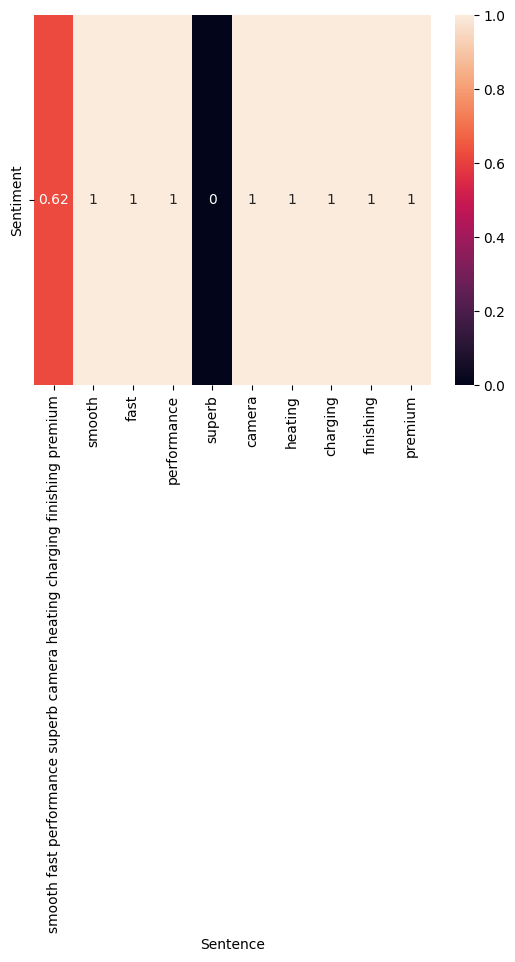

In [34]:
visualize_sentiment({
    "Sentence": [filtered_review] + filtered_review.split(),
    "Sentiment": [siaz.polarity_scores(filtered_review)['compound']] +
      [siaz.polarity_scores(word)['neu'] for word in filtered_review.split()]
})